In [6]:
import urllib.request
import zipfile
import os

# URL del archivo ZIP que deseas descargar
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

# Ruta local donde deseas guardar el archivo ZIP
zip_file_path = "pizza_steak.zip"

# Descargar el archivo ZIP
urllib.request.urlretrieve(url, zip_file_path)

# Directorio donde deseas descomprimir el archivo ZIP
extracted_folder_path = ""

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Eliminar el archivo ZIP después de descomprimirlo
os.remove(zip_file_path)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


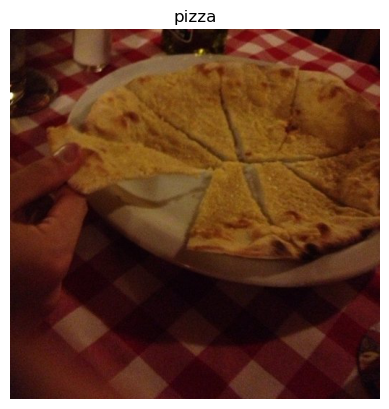

In [8]:
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[25, 10, 15],
        [24,  9, 14],
        [23,  8, 13],
        ...,
        [39,  8,  5],
        [44, 10,  8],
        [46, 12, 10]],

       [[27, 12, 17],
        [25, 10, 15],
        [24,  9, 14],
        ...,
        [41, 10,  7],
        [43,  9,  7],
        [44, 10,  8]],

       [[30, 15, 18],
        [28, 13, 16],
        [25, 10, 13],
        ...,
        [43, 12,  9],
        [40,  9,  6],
        [41,  7,  5]],

       ...,

       [[30, 11, 13],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [13,  6, 13],
        [13,  6, 13],
        [13,  6, 13]],

       [[30, 11, 13],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [10,  3, 10],
        [12,  5, 12],
        [13,  6, 13]],

       [[29, 10, 12],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [ 7,  0,  7],
        [10,  3, 10],
        [12,  5, 12]]], dtype=uint8)>

In [ ]:
import keras.api._v2.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get all pixel values between 0 & 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import datagen from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
valid_data = valid_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")
#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    #Same as the previous one
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])
#Fit the model
history_1 = model_1.fit(x=train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), #its 47 batches(1500/32)
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
46/47 [============================>.] - ETA: 0s - loss: 0.6574 - accuracy: 0.6213